# Example Data Notebook for TAQ Database


In [2]:
! pip install fabric

In [3]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [4]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'Temp'
server_password='Temp'
db_user='Temp'
db_pass='Temp'

In [4]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

In [5]:
exchange="N" #nasdaq 
symbol='AAPL'
start= "2020-01-06"
end="2020-01-07"


In [6]:
result=conn.client_get_trades(exchange,symbol,start,end)

Trade Query for N AAPL 2020-01-06 2020-01-07


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!
/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [7]:
trades=pd.read_csv('data/AAPL_trades.csv')
trades=clean_trades(trades)
trades.to_csv('data/AAPL_trades.csv')

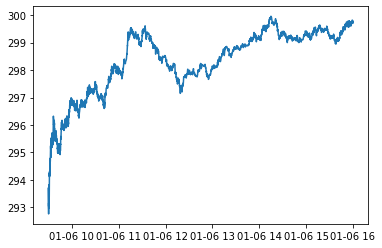

In [8]:
plt.plot(trades['Trade_Price'])

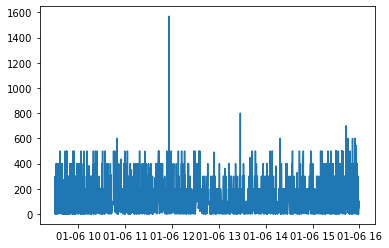

In [9]:
plt.plot(trades['Trade_Volume'])

### Example Quote Query

In [7]:
exchange="N"
symbol='AAPL'
start= "2020-01-06"
end="2020-01-07"


In [8]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [9]:
result=conn.client_get_quotes(exchange,symbol,start,end)

Quote Query for N AAPL 2020-01-06 2020-01-07


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [10]:
quotes=pd.read_csv('data/AAPL_quotes.csv')
quotes=clean_quotes(quotes)
quotes.to_csv('data/AAPL_quotes.csv')

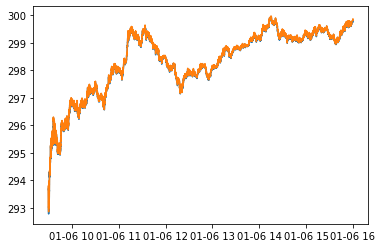

In [11]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

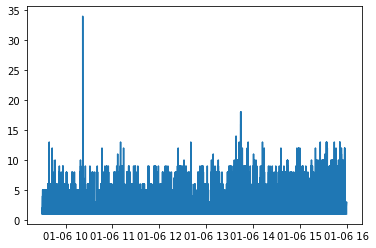

In [12]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
